In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np
import seaborn as sns

warnings.filterwarnings("ignore")
from google.colab import drive


In [99]:
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Data Preprocessing and EDA

In [100]:
dataset = pd.read_csv('/content/drive/MyDrive/GroceryDataset.csv')

In [101]:
dataset.describe()

,Sub Category,Price,Discount,Rating,Title,Currency,Feature,Product Description
count,1757,1754,1757,682,1757,1752,1739,1715
unique,19,184,42,483,1484,1,1401,1435
top,Snacks,$14.99,No Discount,No Reviews,"Ziploc Seal Top Freezer Bag, Gallon, 38-count,...",$,Pick Your Arrival Date at Checkout Gift Mess...,Item may be available in your local warehouse ...
freq,293,81,1626,61,4,1752,7,5


In [102]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Sub Category         1757 non-null   object
 1   Price                1754 non-null   object
 2   Discount             1757 non-null   object
 3   Rating               682 non-null    object
 4   Title                1757 non-null   object
 5   Currency             1752 non-null   object
 6   Feature              1739 non-null   object
 7   Product Description  1715 non-null   object
dtypes: object(8)
memory usage: 109.9+ KB


In [103]:
dataset.head()

,Sub Category,Price,Discount,Rating,Title,Currency,Feature,Product Description
0,Bakery & Desserts,$56.99,No Discount,Rated 4.3 out of 5 stars based on 265 reviews.,"David’s Cookies Mile High Peanut Butter Cake, ...",$,"""10"""" Peanut Butter Cake\nCertified Kosher OU-...",A cake the dessert epicure will die for!Our To...
1,Bakery & Desserts,$159.99,No Discount,Rated 5 out of 5 stars based on 1 reviews.,"The Cake Bake Shop 8"" Round Carrot Cake (16-22...",$,Spiced Carrot Cake with Cream Cheese Frosting ...,"Due to the perishable nature of this item, ord..."
2,Bakery & Desserts,$44.99,No Discount,Rated 4.1 out of 5 stars based on 441 reviews.,"St Michel Madeleine, Classic French Sponge Cak...",$,100 count\nIndividually wrapped\nMade in and I...,Moist and buttery sponge cakes with the tradit...
3,Bakery & Desserts,$39.99,No Discount,Rated 4.7 out of 5 stars based on 9459 reviews.,"David's Cookies Butter Pecan Meltaways 32 oz, ...",$,Butter Pecan Meltaways\n32 oz 2-Pack\nNo Prese...,These delectable butter pecan meltaways are th...
4,Bakery & Desserts,$59.99,No Discount,Rated 4.5 out of 5 stars based on 758 reviews.,"David’s Cookies Premier Chocolate Cake, 7.2 lb...",$,"""10"" Four Layer Chocolate Cake\nCertified Kosh...",A cake the dessert epicure will die for!To the...


In [104]:
(dataset.isnull().sum() / dataset.shape[0]*100).sort_values(ascending=False)


Rating                 61.183836
Product Description     2.390438
Feature                 1.024474
Currency                0.284576
Price                   0.170746
Sub Category            0.000000
Discount                0.000000
Title                   0.000000
dtype: float64

In [105]:
dataset[dataset['Rating'].isna()]

,Sub Category,Price,Discount,Rating,Title,Currency,Feature,Product Description
34,Beverages & Water,$27.99,No Discount,NaN,"Prime Hydration+ Sticks Electrolyte Drink Mix,...",$,Activate with Water No Added Sugar Antioxi...,Hydration+ Sticks Electrolyte Drink Mix\nVarie...
35,Beverages & Water,$21.99,No Discount,NaN,"Prime Hydration Drink, Variety Pack, 16.9 fl o...",$,5 - Tropical Punch 5 - Lemon Lime 5 - Blue...,Limit 5 per member Gluten free\n​Caffeine fr...
36,Beverages & Water,$20.99,After $5 OFF,NaN,"Alani Nu Energy Drink, Variety Pack, 12 fl oz,...",$,6 - Juicy Peach 6 - Cosmic Stardust 6 - Ch...,Zero sugar\n200mg caffeine
37,Beverages & Water,$19.99,After $5 OFF,NaN,"Poppi Prebiotic Soda, Variety Pack, 12 fl oz, ...",$,5 - Doc Pop 5 - Grape 5 - Root Beer 12 f...,Prebiotics for a healthy gut\n5g sugar or less...
38,Beverages & Water,$19.99,After $5 OFF,NaN,"Poppi Prebiotic Soda, Variety Pack, 12 fl oz, ...",$,5 - Strawberry Lemon 5 - Orange 5 - Cherry...,Prebiotics for a healthy gut\n5g sugar or less...
...,...,...,...,...,...,...,...,...
1752,Snacks,$23.99,No Discount,NaN,"Oberto Thin Style Smoked Sausage Stick, Cockta...",$,Cocktail Pepperoni Smoked Sausage Sticks 3...,Cocktail PepperoniSmoked Sausage Sticks3 oz ba...
1753,Snacks,$49.99,No Discount,NaN,"Cheetos Crunchy, Original, 2.1 oz, 64-count",$,Made with Real Cheese,64-count2.1 oz Bags
1754,Snacks,$22.99,No Discount,NaN,"Sabritas Chile & Limon Mix, Variety Pack, 30-c...",$,Chile & Limón Mix Variety Pack 30 ct Net...,8-Doritos Dinamita Chile Limón Flavored Rolled...
1755,Snacks,$17.49,No Discount,NaN,"Fruit Roll-Ups, Variety Pack, 72-count",$,Variety Pack 1 Box with 72 Rolls Flavore...,Fruit Flavored Snacks\nVariety Includes: Straw...


In [106]:
# Function to handle both normal and range values
def clean_price(value):
    if 'through' in str(value):
        # Handle range values
        parts = value.split('through')
        start_value = float(parts[0].replace('$', '').strip())
        end_value = float(parts[1].replace('$', '').strip())
        return (start_value + end_value) / 2
    else:
        # Handle normal values
        return float(str(value).replace('$', '').replace(',', '').strip())


# Clean the price feature
dataset['Price'] = dataset['Price'].apply(clean_price)


In [107]:
dataset[dataset['Price'].isna()]

,Sub Category,Price,Discount,Rating,Title,Currency,Feature,Product Description
1064,Meat & Seafood,NaN,.,Rated 4.5 out of 5 stars based on 4 reviews.,"Hillshire Farm Slow Roasted Turkey Breast, 11 ...",NaN,Gluten Free No Artificial Ingredients No N...,Available at your local Costco warehouse or cl...
1414,Poultry,NaN,.,Rated 4.5 out of 5 stars based on 4 reviews.,"Hillshire Farm Slow Roasted Turkey Breast, 11 ...",NaN,Gluten Free No Artificial Ingredients No N...,Available at your local Costco warehouse or cl...
1480,Snacks,NaN,Costco Members Receive an Additional $5 OFF Ca...,NaN,FITCRUNCH - Costco Next,NaN,Non-GMO Gluten Free Soy Free Flavor Mixo...,Shop Costco Next Chef Robert Irvine’s FITCRU...


In [108]:
subcategory_prices = {
    'Meat & Seafood': dataset[dataset['Sub Category']=='Meat & Seafood'].mean(),
    'Poultry': dataset[dataset['Sub Category']=='Poultry'].mean(),
    'Snacks': dataset[dataset['Sub Category']=='Snacks'].mean()
}


In [109]:
subcategory_prices

{'Meat & Seafood': Price    224.745315
 dtype: float64,
 'Poultry': Price    159.99
 dtype: float64,
 'Snacks': Price    21.53589
 dtype: float64}

In [110]:
dataset['Price'] = dataset.apply(lambda row: subcategory_prices[row['Sub Category']] if pd.isna(row['Price']) else row['Price'], axis=1)


In [111]:
dataset['Price'] = dataset['Price'].astype(np.float64)

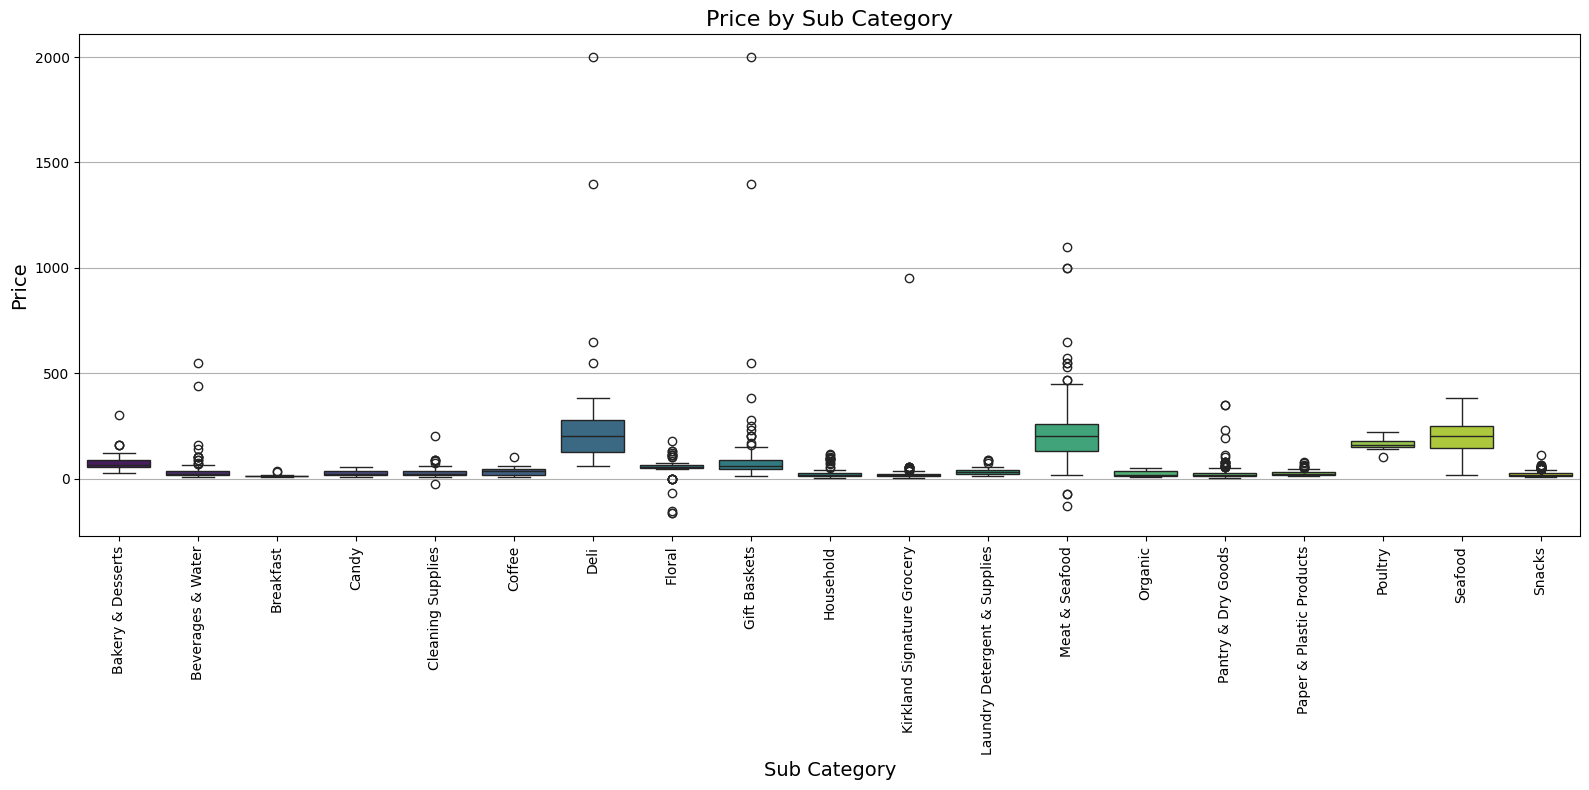

In [112]:
dataset['Sub Category'] = dataset['Sub Category'].astype('category')

plt.figure(figsize=(16, 8))
sns.boxplot(x='Sub Category', y='Price', data=dataset, palette='viridis')

plt.xticks(rotation=90)
plt.xlabel('Sub Category', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Price by Sub Category', fontsize=16)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

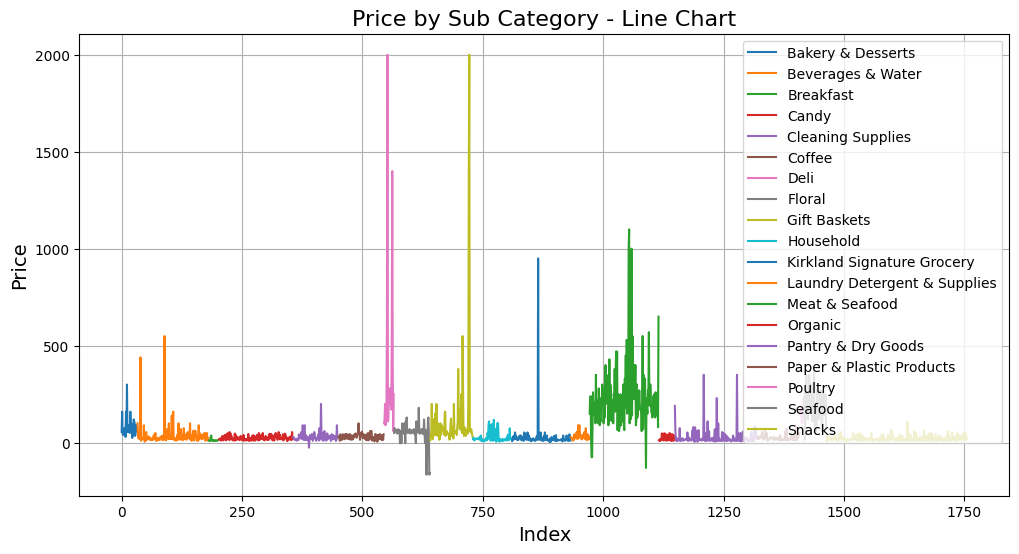

In [113]:
plt.figure(figsize=(12, 6))
for subcategory, group in dataset.groupby('Sub Category'):
    plt.plot(group.index, group['Price'], label=subcategory)

plt.xlabel('Index', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Price by Sub Category - Line Chart', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()


In [114]:
dataset['Rating']

0        Rated 4.3 out of 5 stars based on 265 reviews.
1            Rated 5 out of 5 stars based on 1 reviews.
2        Rated 4.1 out of 5 stars based on 441 reviews.
3       Rated 4.7 out of 5 stars based on 9459 reviews.
4        Rated 4.5 out of 5 stars based on 758 reviews.
                             ...                       
1752                                                NaN
1753                                                NaN
1754                                                NaN
1755                                                NaN
1756                                                NaN
Name: Rating, Length: 1757, dtype: object

In [115]:
dataset['Rating'] = dataset['Rating'].astype(str)

# Extract features from the 'Rating' column
rating_info = dataset['Rating'].str.extract(r'Rated (\d+(\.\d+)?) out of 5 stars based on (\d+) reviews.')

# Rename columns for clarity
rating_info.columns = ['Numerical Rating', 'Decimal Part', 'Number of Reviews']

# Convert relevant columns to numeric
rating_info['Numerical Rating'] = pd.to_numeric(rating_info['Numerical Rating'], errors='coerce')
rating_info['Number of Reviews'] = pd.to_numeric(rating_info['Number of Reviews'], errors='coerce')



In [116]:
# Add extracted features to the original DataFrame
dataset = pd.concat([dataset, rating_info], axis=1)

# Drop the intermediate 'Rating' column
dataset = dataset.drop(columns='Rating')

In [117]:
dataset[dataset['Numerical Rating'].isna()].head(1)['Title']

16    Classic Cake Tiramisu Quarter Sheet Cake (14 P...
Name: Title, dtype: object

In [118]:
# Calculate average rating and average number of reviews for each subcategory
average_ratings = dataset.groupby('Sub Category')['Numerical Rating'].mean()
average_reviews = dataset.groupby('Sub Category')['Number of Reviews'].mean()

# Fill missing values with averages based on subcategory
dataset['Numerical Rating'].fillna(dataset['Sub Category'].map(average_ratings), inplace=True)
dataset['Number of Reviews'].fillna(dataset['Sub Category'].map(average_reviews), inplace=True)

In [119]:
dataset[dataset['Numerical Rating'].isna()]

,Sub Category,Price,Discount,Title,Currency,Feature,Product Description,Numerical Rating,Decimal Part,Number of Reviews
730,Household,18.99,No Discount,Cambro CamSquare 2 Quart Food Storage Containe...,$,Model: 2SFSPP Translucent Capacity: 2 Quar...,Model: 2SFSPP CamSquare Food Storage Container...,NaN,NaN,NaN
731,Household,25.99,No Discount,Cambro Square 4-Quart Food Storage Container w...,$,Model: 4SFSPP Translucent Capacity: 4 Quar...,Use to maximize storage of ingredients in the ...,NaN,NaN,NaN
732,Household,11.99,No Discount,Cambro Round 2-Quart Food Storage Container wi...,$,Round Food Storage Container with Lid Transl...,Use to store ingredients or transport ready-to...,NaN,NaN,NaN
733,Household,12.99,No Discount,Cambro Round 4 Quart Food Storage Container wi...,$,Round Food Storage Container with Lid Transl...,Model: 8SFSPP\nRound Food Storage Container wi...,NaN,NaN,NaN
734,Household,17.99,No Discount,"Kirkland Signature Alkaline AA Batteries, 48-c...",$,12-Year Shelf Life No Mercury Added,Alkaline BatteriesSize: AA48-count,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
806,Household,73.99,No Discount,iSi North America 1 Pint Stainless Cream Whipp...,$,All-metal design NSF approved Industrial d...,Cream Whipper Dispenser1 pintStainless steelMo...,NaN,NaN,NaN
807,Household,18.99,No Discount,"Post-It Self-Stick Notes, Assorted Colors, 24-...",$,"24 Packs of 100 ea - Total of 2,400 Sheets\nDi...",Limit 5 per memberItem may be available in you...,NaN,NaN,NaN
808,Household,18.99,No Discount,"Nouvelle Legende Flour Sack Towels, 12 Pack",$,NaN,Model: NLFST12Flour Sack Towels100% CottonComm...,NaN,NaN,NaN
809,Household,22.99,No Discount,Russell International Take-Apart Poultry Shear...,$,NaN,Model: 7322Multi-purpose Poultry ShearsForged ...,NaN,NaN,NaN


In [120]:
dataset = dataset[dataset['Sub Category']!='Household']

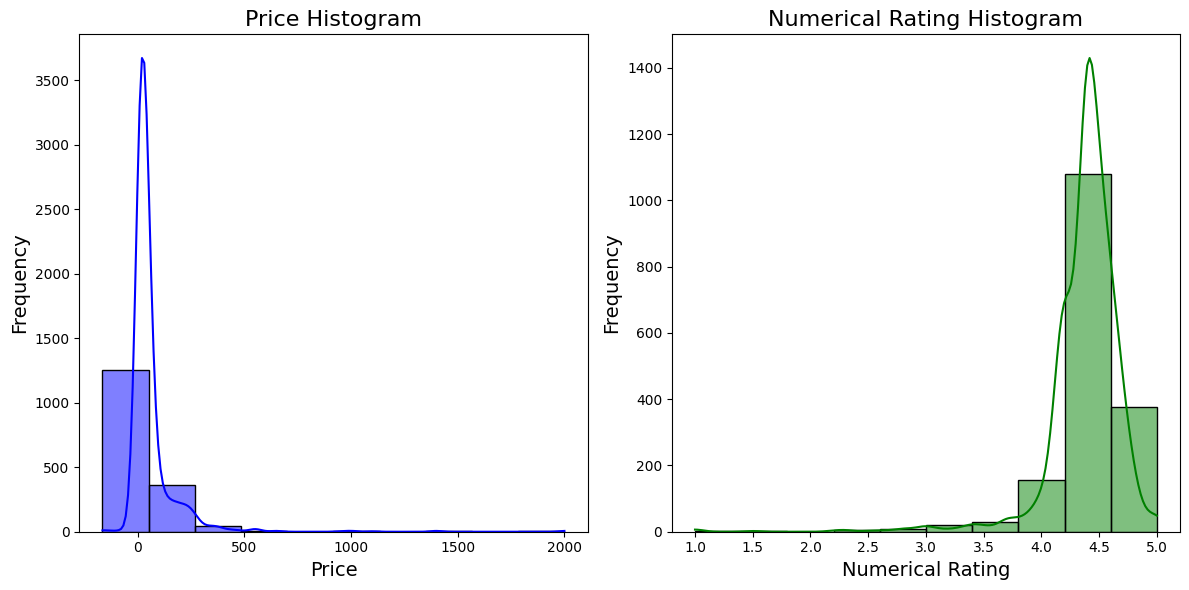

In [121]:
# Create histograms
plt.figure(figsize=(12, 6))

# Histogram for 'Price'
plt.subplot(1, 2, 1)
sns.histplot(dataset['Price'], bins=10, kde=True, color='blue')
plt.title('Price Histogram', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Histogram for 'Numerical Rating'
plt.subplot(1, 2, 2)
sns.histplot(dataset['Numerical Rating'], bins=10, kde=True, color='green')
plt.title('Numerical Rating Histogram', fontsize=16)
plt.xlabel('Numerical Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

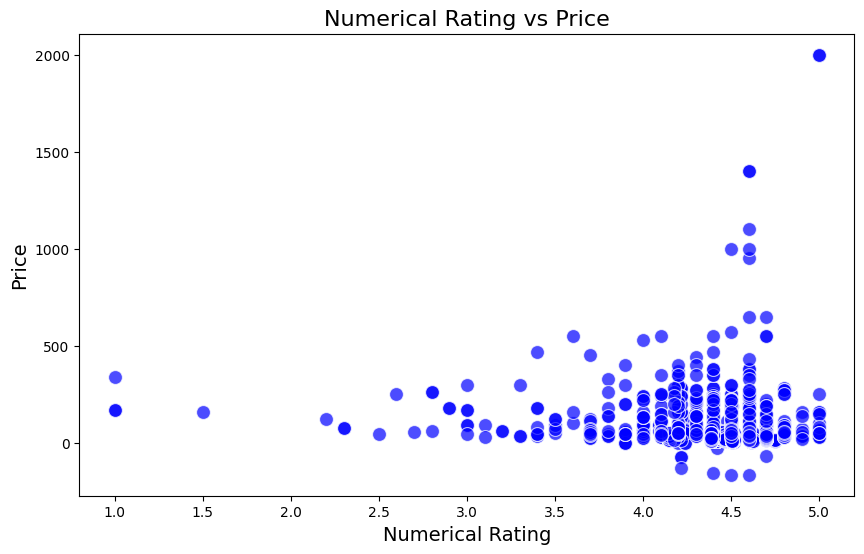

In [122]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Numerical Rating', y='Price', data=dataset, color='blue', s=100, alpha=0.7)

# Set labels and title
plt.xlabel('Numerical Rating', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Numerical Rating vs Price', fontsize=16)

# Display the plot
plt.show()

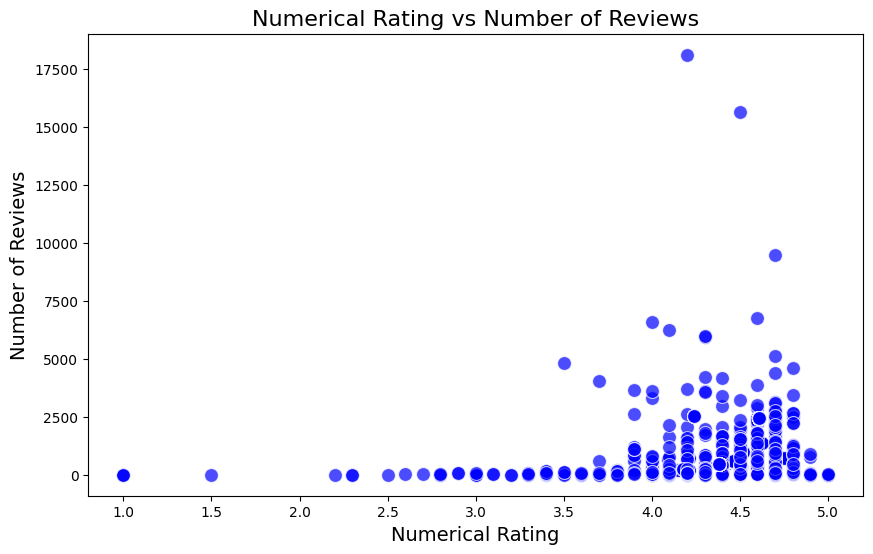

In [123]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Numerical Rating', y='Number of Reviews', data=dataset, color='blue', s=100, alpha=0.7)

# Set labels and title
plt.xlabel('Numerical Rating', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.title('Numerical Rating vs Number of Reviews', fontsize=16)

# Display the plot
plt.show()

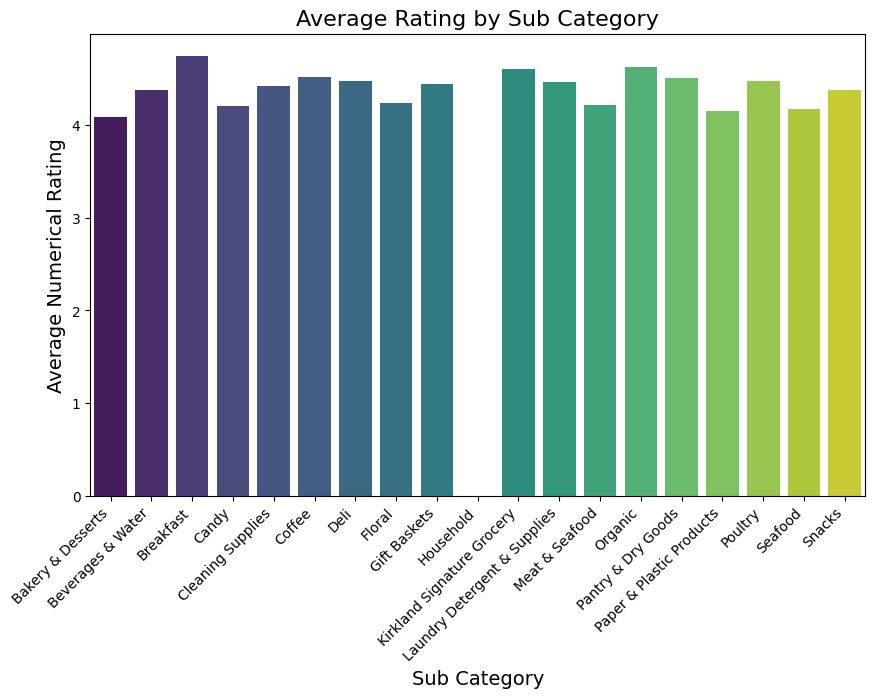

In [124]:
# Create a bar plot for average rating by subcategory
plt.figure(figsize=(10, 6))
sns.barplot(x='Sub Category', y='Numerical Rating', data=dataset, ci=None, palette='viridis')
plt.xticks(rotation=45, ha='right')  # Adjust the rotation angle as needed

# Set labels and title
plt.xlabel('Sub Category', fontsize=14)
plt.ylabel('Average Numerical Rating', fontsize=14)
plt.title('Average Rating by Sub Category', fontsize=16)

# Display the plot
plt.show()

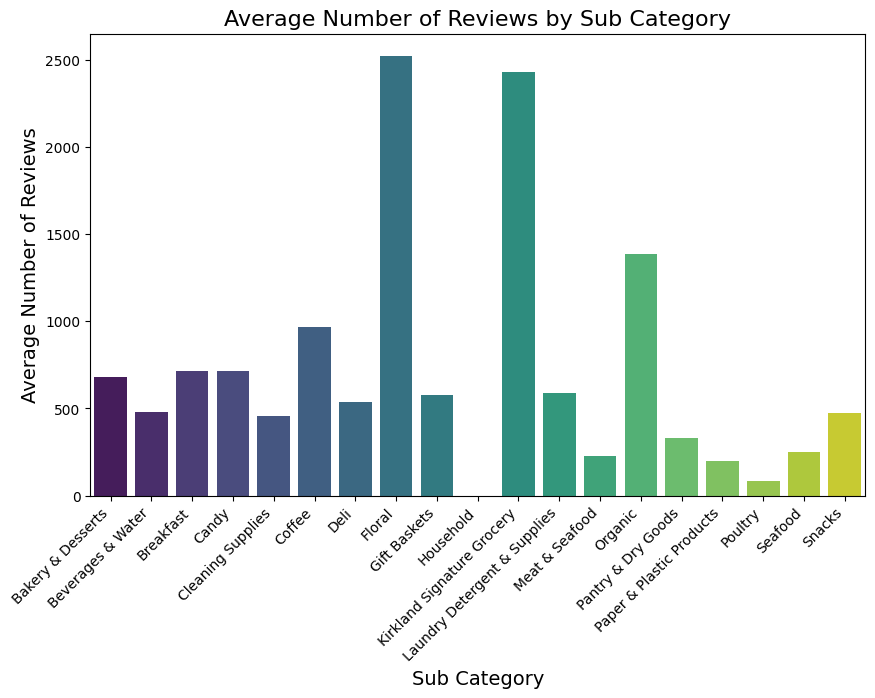

In [125]:
# Create a bar plot for average rating by subcategory
plt.figure(figsize=(10, 6))
sns.barplot(x='Sub Category', y='Number of Reviews', data=dataset, ci=None, palette='viridis')
plt.xticks(rotation=45, ha='right')  # Adjust the rotation angle as needed

# Set labels and title
plt.xlabel('Sub Category', fontsize=14)
plt.ylabel('Average Number of Reviews', fontsize=14)
plt.title('Average Number of Reviews by Sub Category', fontsize=16)

# Display the plot
plt.show()

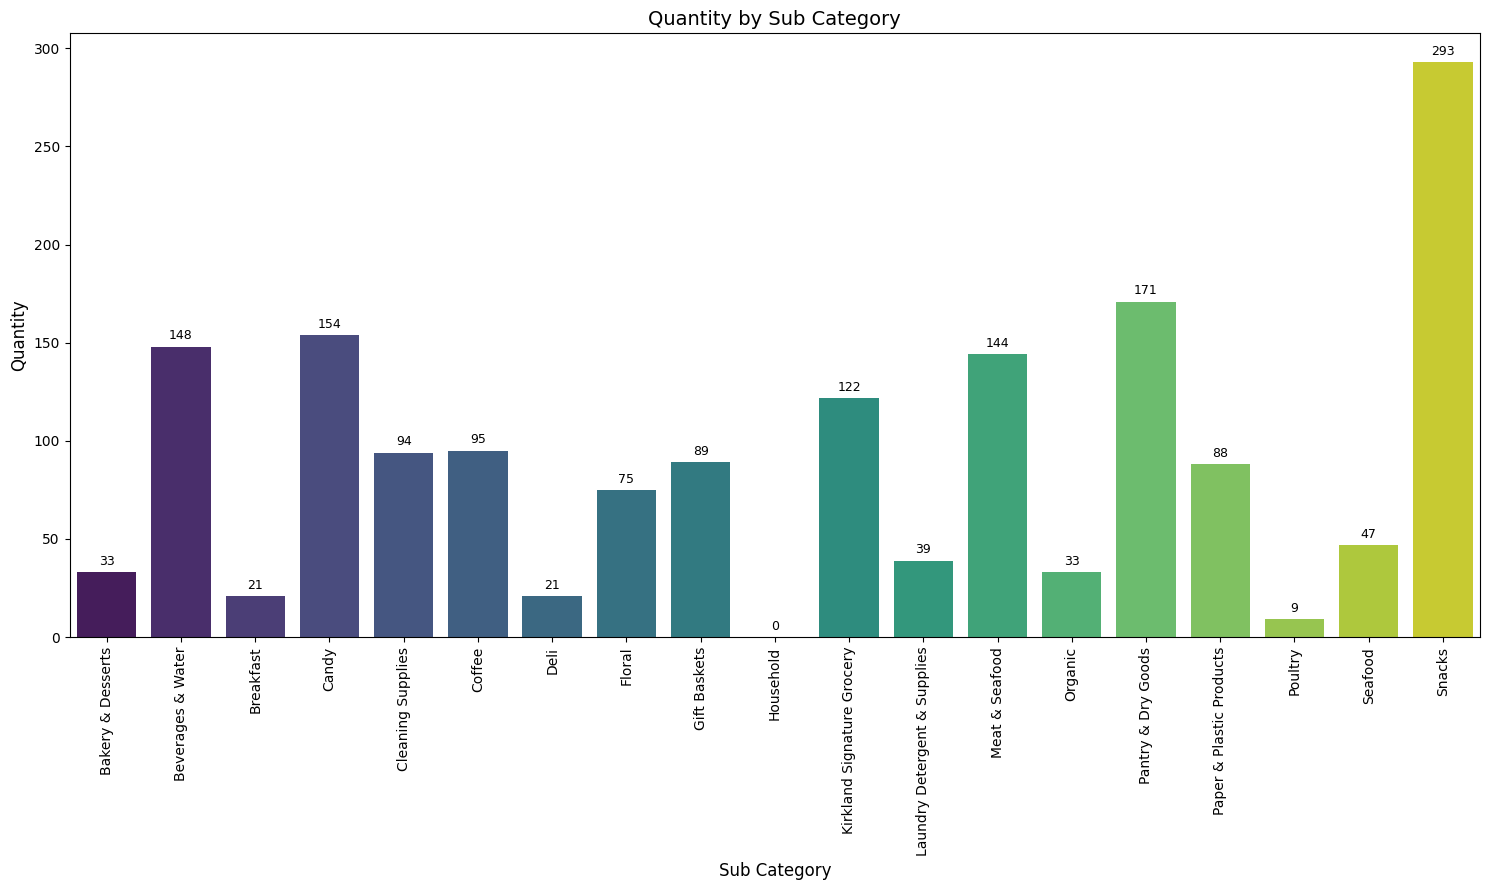

In [126]:
total_quantity_per_subcategory = dataset.groupby('Sub Category')['Price'].count().reset_index()

total_per_subcategory = total_quantity_per_subcategory.rename(columns={'Price': 'Quantity'})

sorted_subcategories_by_quantity = total_per_subcategory.sort_values('Quantity', ascending=False)

plt.figure(figsize=(15, 9))
ax = sns.barplot(data=sorted_subcategories_by_quantity, x='Sub Category', y='Quantity', palette='viridis')

plt.xticks(rotation=90)

for bar in ax.patches:
    ax.annotate(f'{bar.get_height():,.0f}',
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='bottom',
                fontsize=9, xytext=(0, 3),
                textcoords='offset points')

plt.xlabel('Sub Category', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.title('Quantity by Sub Category', fontsize=14)

plt.tight_layout()

plt.show()

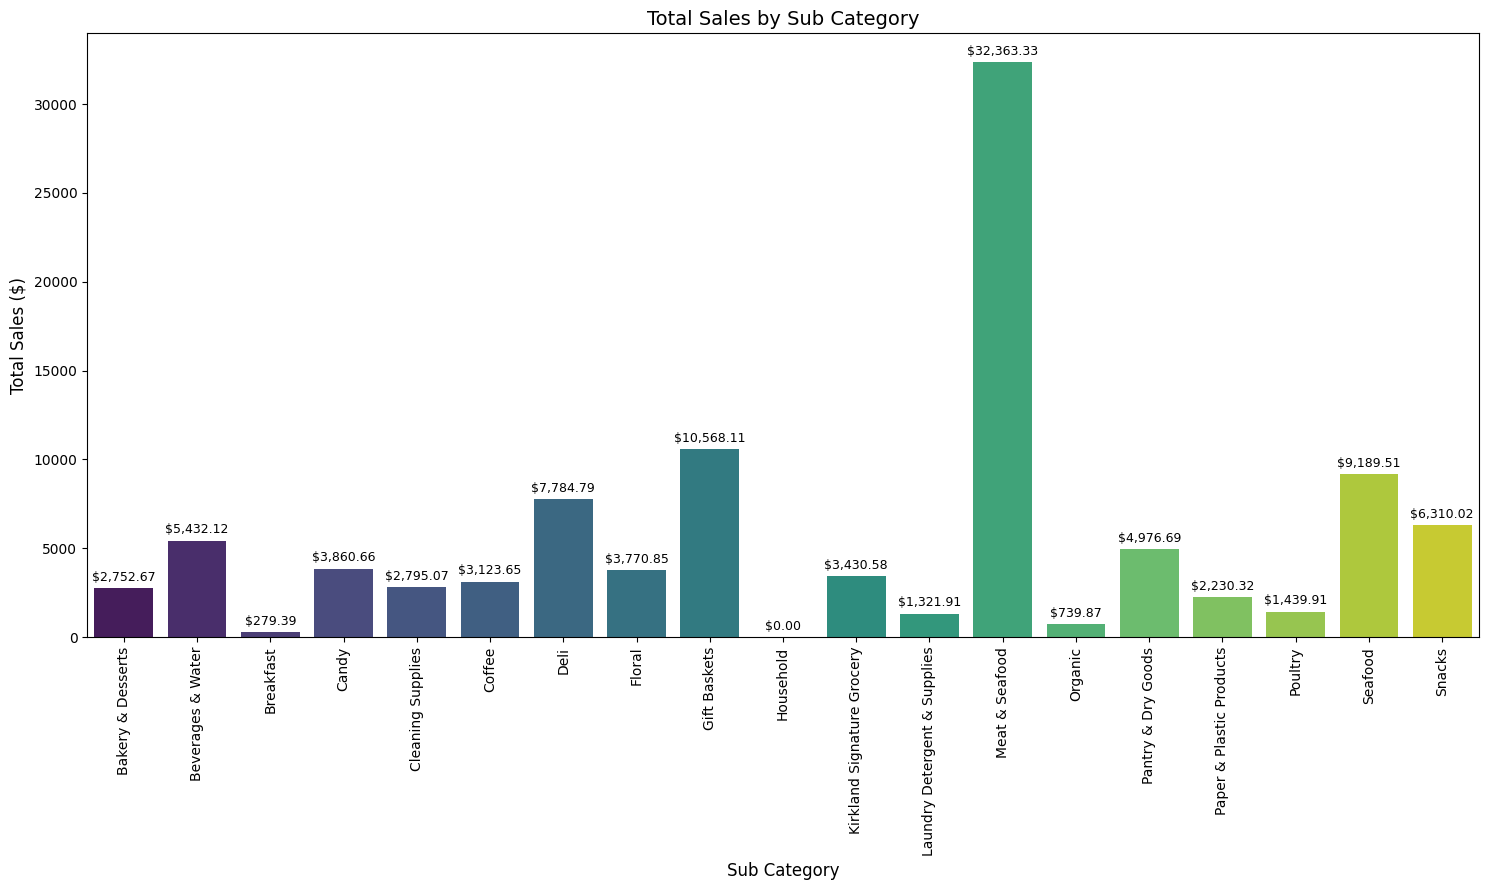

In [127]:
total_sales_per_subcategory = dataset.groupby('Sub Category')['Price'].sum().reset_index()

sorted_subcategories_by_sales = total_sales_per_subcategory.sort_values('Price', ascending=False)

plt.figure(figsize=(15, 9))
ax = sns.barplot(data=sorted_subcategories_by_sales, x='Sub Category', y='Price', palette='viridis')

plt.xticks(rotation=90)

for bar in ax.patches:
    ax.annotate(f'${bar.get_height():,.2f}',
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='bottom',
                fontsize=9, xytext=(0, 3),
                textcoords='offset points')

plt.xlabel('Sub Category', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.title('Total Sales by Sub Category', fontsize=14)

plt.tight_layout()

plt.show()

In [128]:
# Calculate total sales per subcategory
total_sales_per_subcategory = dataset.groupby('Sub Category')['Price'].sum().reset_index()
total_sales_per_subcategory.columns = ['Sub Category', 'Total Sales']

# Merge the total sales information with the original dataset
dataset = pd.merge(dataset, total_sales_per_subcategory, on='Sub Category')


In [129]:
# Calculate total quantity (number of items) per subcategory
total_quantity_per_subcategory = dataset.groupby('Sub Category')['Price'].count().reset_index()
total_quantity_per_subcategory.columns = ['Sub Category', 'Total Quantity']

# Merge the total quantity information with the original dataset
dataset = pd.merge(dataset, total_quantity_per_subcategory, on='Sub Category')


In [130]:
# Extract numeric discounts using regular expressions
dataset['Numeric Discount'] = dataset['Discount'].str.extract(r'[\$\d,]+(\.\d{1,2})?')

# Convert the extracted numeric discounts to numeric values
dataset['Numeric Discount'] = pd.to_numeric(dataset['Numeric Discount'], errors='coerce')

# Calculate the discount percentage
dataset['Discount Percentage'] = dataset['Numeric Discount'] / dataset['Price'] * 100

# Calculate the discounted price
dataset['Discounted Price'] = dataset['Price'] - dataset['Numeric Discount']
dataset[['Numeric Discount', 'Discount Percentage', 'Discounted Price']] = \
dataset[['Numeric Discount', 'Discount Percentage', 'Discounted Price']].fillna(0)


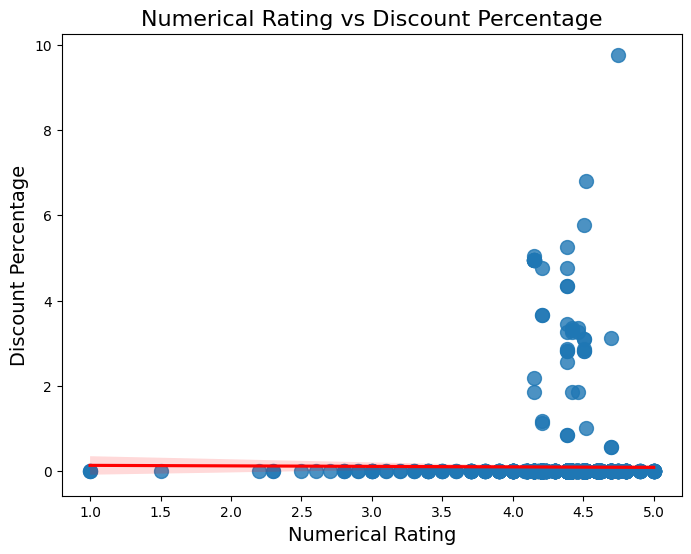

In [131]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Numerical Rating', y='Discount Percentage', data=dataset, scatter_kws={'s': 100}, line_kws={'color': 'red'})

plt.xlabel('Numerical Rating', fontsize=14)
plt.ylabel('Discount Percentage', fontsize=14)
plt.title('Numerical Rating vs Discount Percentage', fontsize=16)

plt.show()

In [132]:
dataset.drop(columns = ['Feature','Product Description','Decimal Part','Currency','Title','Numeric Discount','Discount'],inplace =True)

In [133]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1676 entries, 0 to 1675
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Sub Category         1676 non-null   category
 1   Price                1676 non-null   float64 
 2   Numerical Rating     1676 non-null   float64 
 3   Number of Reviews    1676 non-null   float64 
 4   Total Sales          1676 non-null   float64 
 5   Total Quantity       1676 non-null   int64   
 6   Discount Percentage  1676 non-null   float64 
 7   Discounted Price     1676 non-null   float64 
dtypes: category(1), float64(6), int64(1)
memory usage: 107.1 KB


Model Implemetation

In [135]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.impute import SimpleImputer

# Sample data (replace this with your actual dataset)
# Assuming 'dataset' is your DataFrame
# X should contain the features, y should contain the target 'Numerical Rating'
X = dataset.drop('Numerical Rating', axis=1)
y = dataset['Numerical Rating']

# Define categorical and numerical features
categorical_features = ['Sub Category']
numerical_features = ['Price', 'Number of Reviews', 'Total Sales', 'Total Quantity', 'Discount Percentage', 'Discounted Price']

# Define preprocessing steps for categorical and numerical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Create a column transformer to apply transformations to different feature types
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('regressor', model)])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model (for regression, you might want to use a different metric)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Squared Error: {mae}')

Mean Squared Error: 0.08580498055986789
Mean Squared Error: 0.11740074261912288


Feature Importance

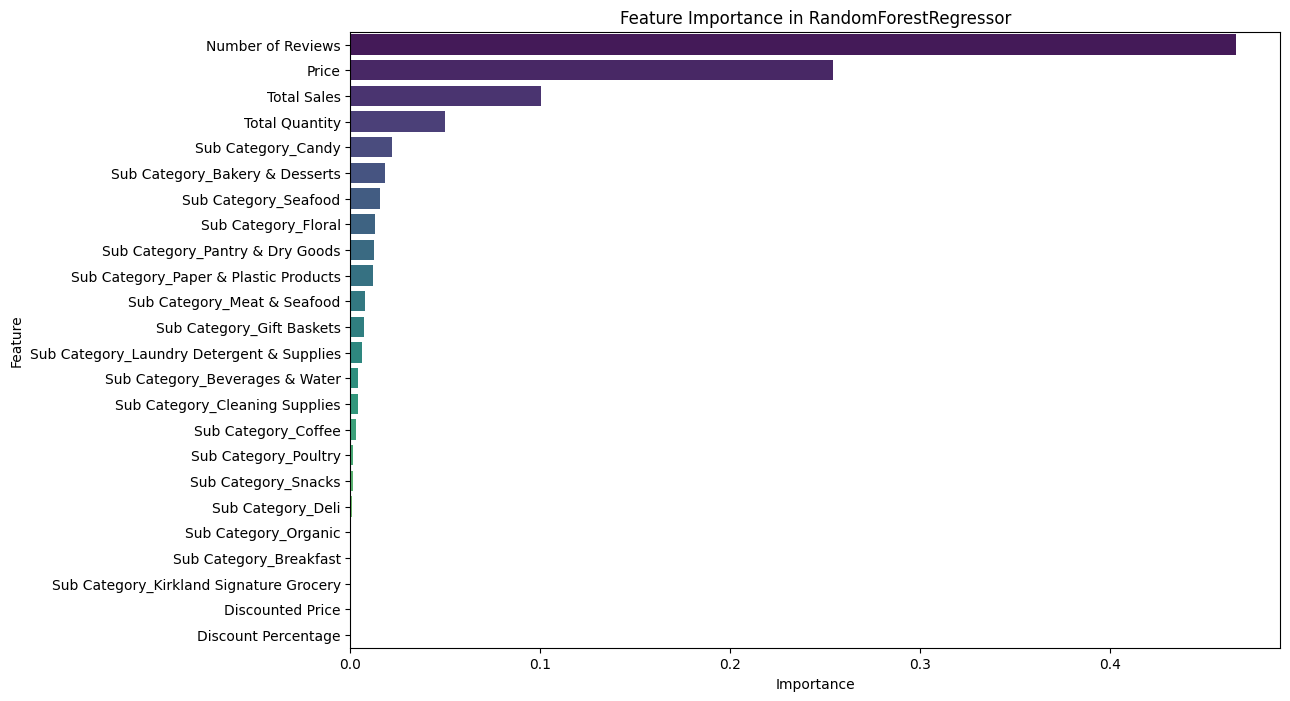

In [136]:
model = pipeline.named_steps['regressor']

# Extract feature importances
feature_importances = model.feature_importances_

# Get feature names from the preprocessor
categorical_feature_names = pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(input_features=categorical_features)
feature_names = numerical_features + list(categorical_feature_names)

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance in RandomForestRegressor')
plt.show()